In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Homework 1
## Problem 1
1. Using neural activity to predict monkey movements

a. Imagine that you are recording a neuron inside the monkey motor cortex. You suspect
that activity of this neuron reflects whether the monkeys hand is open or closed. Every
20 ms, the neuron either fires an action potential (called a spike) or it does not.

Let us assume the following probabilities:

$p\left( {{\text{hand open}}} \right) = 0.5$
<br />
$p\left( {{\text{spike}}|{\text{hand open}}} \right) = 0.6$
<br />
$p\left( {{\text{spike}}|{\text{hand close}}} \right) = 0.35$
<br />

You observe a series of 10 spikes spaced evenly over the course of 200 ms.
What is the probability that the hand is open, given the data?

*Answer*

The probability that the hand is open is

$
p(\textrm{open} | \textrm{10 spikes}) = \frac{
p(\textrm{10 spikes} | \textrm{open} )p(\textrm{open})
}{
p(\textrm{10 spikes})
}
$

and also

$
p(\textrm{10 spikes}) =
p(\textrm{10 spikes} | \textrm{open} )p(\textrm{open}) +
p(\textrm{10 spikes} | \textrm{closed} )p(\textrm{closed})
$

In [2]:
pOpen = 0.5
pClosed = 1 - pOpen

p1Open = 0.6
p1Closed = 0.35

p10Open = p1Open ** 10
p10Closed = p1Closed ** 10

p10 = p10Open * pOpen + p10Closed * pClosed

pOpen10 = p10Open*pOpen/p10

print(f'The probability of the hand being open, given 10 spikes is {pOpen10:.4f}')

The probability of the hand being open, given 10 spikes is 0.9955


b. What is the probability for (a) if $p(\textrm{open}) = 0.05$?

*Answer*

In [3]:
pOpen = 0.05
pClosed = 1 - pOpen
p10 = p10Open * pOpen + p10Closed * pClosed
pOpen10 = p10Open*pOpen/p10
print(f'The probability of the hand being open, given 10 spikes')
print(f'and a prior proabability of open of 0.05')
print(f'is {pOpen10:.4f}')

The probability of the hand being open, given 10 spikes
and a prior proabability of open of 0.05
is 0.9202


c. What would be the probability if you had observed only 5 spikes
in the same 200 ms?

*Answer*

In [4]:
pOpen = 0.5
pClosed = 1 - pOpen
p5Open = p1Open**5*(1-p1Open)**5
p5Closed = p1Closed**5*(1-p1Closed)**5
p5 = p5Open*pOpen + p5Closed*pClosed
pOpen5 = p5Open*pOpen / p5

print(f'The probability of the hand being open, given 5 spikes')
print(f'is {pOpen5:.4f}')

The probability of the hand being open, given 5 spikes
is 0.5665


## Problem 2

In the lecture we saw equations that allow us to calculate the
posterior distribution of the mean if the prior distribution is
normal and the likelihood is normal as well. It is also possible
to use a method called grid estimation. To do grid estimation, we
select points  $\mu_k$ for $k=1,\ldots,K$ . For each point $\mu_k$ ,
we calculate a value proportional to the posterior distribution
through simple multiplication using the formula:

\begin{equation}
p( \mu_k |  x_i, \sigma_x ) \propto p( x_i| \mu_k, \sigma_x)p( \mu_k)
\end{equation}

Let’s call this multiplication  $q\left( {{\mu }_{k}} \right)=p\left( \left\{ {{x}_{i}} \right\}\left| {{\mu }_{k}},{{\sigma }_{x}} \right. \right)p\left( {{\mu }_{k}} \right)$.
We can normalize to approximate the posterior by dividing by the total:

\begin{equation}
p\left( {{\mu }_{k}}\left| \left\{ {{x}_{i}} \right\},{{\sigma }_{x}} \right. \right)=\frac{q\left( {{\mu }_{k}} \right)}{\sum\limits_{k}{q\left( {{\mu }_{k}} \right)}}
\end{equation}

Usually, this approach yields an accurate picture of the posterior distribution with only 100 points and certainly provides accuracy with 500.

a.	Use this approach to solve again the exercise at the end of the lecture, but this time using a grid approximation. All numbers are in Newtons:
Your prior about the box is  $\mu_0=3.5$ with confidence $\sigma_0 = 1$.
<br >
Your confidence in your perception is $\sigma_x = 1$.
<br >
Your lift the box multiple times and perceive the weight to
be 6, 6, 7, 7, 4 and 5.
<br >
Plot the posterior of distribution of the weight after each lift on a grid of 500 points between 0 and 10.

*Answer*

Set up the constants and the underlying grid

In [6]:
mu_0 = 3.5
sigma_0 = 1
sigma_x = 1
x = [6, 6, 7, 7, 4, 5]
mu_k = np.arange(start=0, stop=10, step=10/500)

print(f'Mean of inputs is {np.mean(x):.2f}')

Mean of inputs is 5.83


Now we can generate the prior

Text(0.5, 1.0, 'Prior')

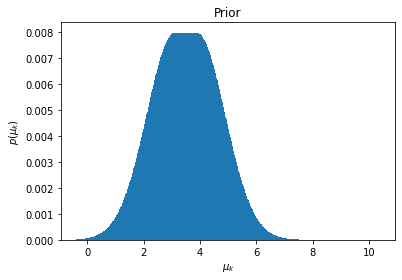

In [4]:
p_mu = norm.pdf(mu_k, loc=mu_0, scale = sigma_0)
p_mu = p_mu/sum(p_mu)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

ax.bar(mu_k, p_mu)
ax.set_xlabel('$\mu_k$')
ax.set_ylabel('$p(\mu_k)$')
ax.set_title(f'Prior')


And now loop for each posterior

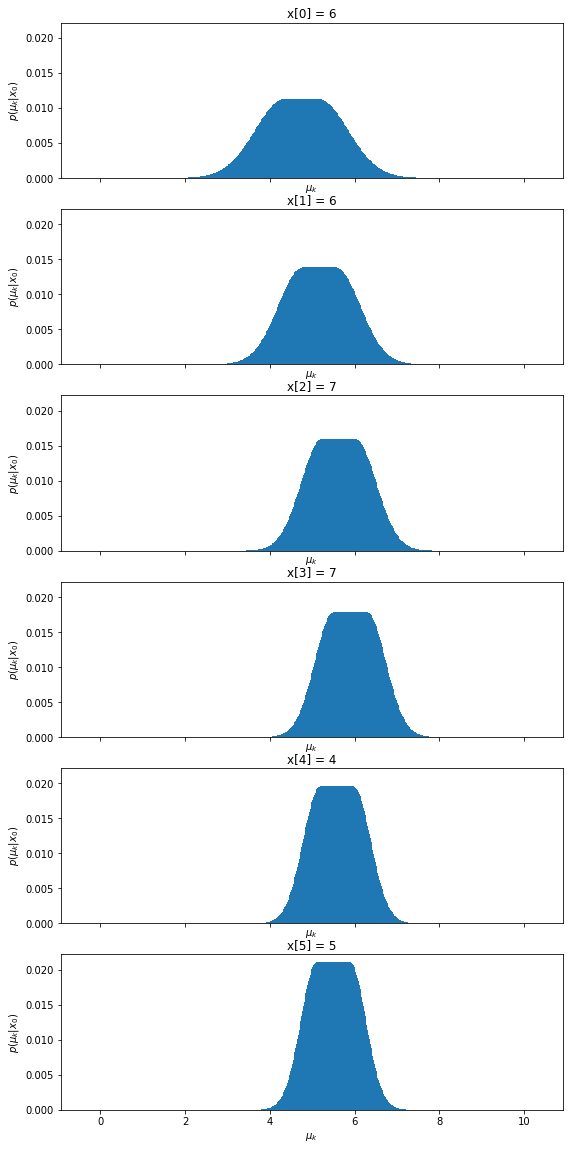

In [54]:
fig, ax = plt.subplots(nrows=len(x), figsize=(9,20),
                       sharex='all', sharey='all')
fig.patch.set_facecolor('white')

this_p_mu = p_mu # Set initial prior

for i,x_i in enumerate(x):
    # Likelihood
    p_x_mu = norm.pdf(x_i, loc=mu_k, scale=sigma_x)

    # Unnormalized posterior
    p_mu_x = p_x_mu*this_p_mu

    # Normalized posterior
    p_mu_x = p_mu_x / sum(p_mu_x)

    ax[i].bar(mu_k, p_mu_x)
    ax[i].set_xlabel('$\mu_k$')
    ax[i].set_ylabel('$p(\mu_k | x_0)$')
    ax[i].set_title(f'x[{i}] = {x_i}')

    # Now set the prior to the previous posterior
    this_p_mu = p_mu_x

b.	In these experiments, subjects need to report whether the box is
heavier or lighter than the reference box of 6 N. We can model this
forced-choice reporting by picking an estimated weight at random from
the posterior distribution and saying the box we are lifting is
lighter than the reference if our number is less than 6 and heavier
if it is greater than 6.
What is the probability of claiming that the small box (prior
for $\mu=3.5$) is actually heavier before lifting any box and
then after each lift of the box in part (a).

*Answer*

We can repeat the loop in the last exercise, but this time each time
through the loop we will check the probability of picking a random number
from the posterior that is greater than 6.

This is easy to do, all we need to do is check how much of the posterior
is greater than 6.

In [7]:
p_6 = sum(p_mu[mu_k>6])
print(f'The probability based only on the prior is {p_6:.2f}')

this_p_mu = p_mu # Set initial prior
for i,x_i in enumerate(x):
    p_x_mu = norm.pdf(x_i, loc=mu_k, scale=sigma_x)
    p_mu_x = p_x_mu*this_p_mu
    p_mu_x = p_mu_x / sum(p_mu_x)

    p_6 = sum( p_mu_x[mu_k > 6])
    print(f'The probability after the {i+1}-th lift of {x_i} is {p_6:.2f}')

    this_p_mu = p_mu_x

The probability based only on the prior is 0.01
The probability after the 1-th lift of 6 is 0.04
The probability after the 2-th lift of 6 is 0.07
The probability after the 3-th lift of 7 is 0.22
The probability after the 4-th lift of 7 is 0.40
The probability after the 5-th lift of 4 is 0.15
The probability after the 6-th lift of 5 is 0.09


c. Determine whether the results in parts (a) and (b) are consistent with the graphs on
slide 14 (copied below). How are the consistent or inconsistent?

*Answer*

They are consistent because the actual esimate of how heavy the box is
and the probability of saying it is heavior goes up on subsequent lifts.

## Problem 3

You are running an experiment where a participant is facing several
 speakers and several lights that are placed in a semicircle (±90◦) around
 them. As the experimenter, you can manipulate the average location and noise
 of auditory and visual feedback by controlling which lights and speakers
 will turn on. On a particular trial, you turn on a few lights to light up
 so that it is hard to pinpoint exactly where
 (${{\mu }_{v}}=-{{10.0}^{\circ }},{{\sigma }_{v}}={{5}^{\circ }}$).
 Simultaneously, you set a few speakers to produce a tone
 (${{\mu }_{a}}={{25.0}^{\circ }},{{\sigma }_{a}}={{15}^{\circ }}$). The
 participant has to point towards a single location that best captures the
 source of the light and sound. Assuming they have no prior inclination to
 point in any specific direction, where do you expect them to point? If
 a particular subject points towards towards  $-{{2}^{\circ }}$,
 is their behavior still consistent with Bayesian estimation? Where
 would they need to point to convince you that their estimation
 process is not Bayesian?

*Answer*

We will treat this as a two step process of including information into
prior knowledge. The prior knowledge is flat:

In [8]:
mu_0 = 0
sigma_0 = 10000

Now let's add in the visual estimate:

In [9]:
mu_v = -10
sigma_v = 5

# This is just to make the equations easier to type
tau_v = 1/sigma_v**2
tau_0 = 1/sigma_0**2

mu_v1 = (tau_v*mu_v + tau_0*mu_0) / (tau_v+tau_0)
sigma_v1 = np.sqrt(1 / (tau_v + tau_0))

print(f'Including the visual input we have an estimate of {mu_v1:.1f} with an uncertainty of {sigma_v1:.2f}')

Including the visual input we have an estimate of -10.0 with an uncertainty of 5.00


We can see that if you have no prior information, then the estimate with the new data is just what
is indicated by that data. We could have actually skipped this step and just started with incoporating
the visual into the auditory information.

Now we add in the auditory information.

In [10]:
mu_a = 25
sigma_a = 15

tau_v1 = 1/sigma_v1**2
tau_a = 1/sigma_a**2

mu_av = (tau_v1*mu_v1 + tau_a*mu_a)/(tau_v1+tau_a)
sigma_av = np.sqrt(1/(tau_v1+tau_a))

print(f'Including both inputs, we have an estimate of {mu_av:.1f} with an uncertainty of {sigma_av:.2f}')

Including both inputs, we have an estimate of -6.5 with an uncertainty of 4.74


A subject who points at $-2^{\circ}$ is within the uncertainty and is thus reasonably consistent with
the Bayesian estimate.

If they pointed at a point more than twice the uncertainty, that would certainly be inconsistent with
Bayesian estimate. That is, anywhere to the left of $\mu_{av}-2\sigma_{av}$ or to the right of
$\mu_{av}+2\sigma_{av}$

In [16]:
print(f'Esimates to the right of {mu_av-2*sigma_av:.1f} or the left of {mu_av+2*sigma_av:.1f} are not Bayesian estimates')

p_1_sigma = norm.cdf(mu_av+sigma_av, loc=mu_av, scale=sigma_av) - norm.cdf(mu_av-sigma_av, loc=mu_av, scale=sigma_av)
p_outside_1_sigma = 1 - p_1_sigma

print(f'The probability to point outside one $\sigma$ of $\mu$ is {p_outside_1_sigma:.3f}')

p_2_sigma = norm.cdf(mu_av+2*sigma_av, loc=mu_av, scale=sigma_av) - norm.cdf(mu_av-2*sigma_av, loc=mu_av, scale=sigma_av)
p_outside_2_sigma = 1 - p_2_sigma

print(f'The probability to point outside two $\sigma$ of $\mu$ is {p_outside_2_sigma:.3f}')

p_3_sigma = norm.cdf(mu_av+3*sigma_av, loc=mu_av, scale=sigma_av) - norm.cdf(mu_av-3*sigma_av, loc=mu_av, scale=sigma_av)
p_outside_3_sigma = 1 - p_3_sigma

print(f'The probability to point outside 3 $\sigma$ of $\mu$ is {p_outside_3_sigma:.3f}')


Esimates to the right of -16.0 or the left of 3.0 are not Bayesian estimates
The probability to point outside one $\sigma$ of $\mu$ is 0.317
The probability to point outside two $\sigma$ of $\mu$ is 0.046
The probability to point outside 3 $\sigma$ of $\mu$ is 0.003
